In [1]:
import pandas as pd            # libraries are used for cleaning, calculation, visualization, customization of the visual.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime        

In [2]:
import warnings
warnings.filterwarnings("ignore")
# this will ignore the warning messages for some of our code to print it on the output section.

# Data collection

In [3]:
df = pd.read_csv("UberDataset.csv")     # reading/importing the dataset 

In [4]:
df  # diplays the dataset as stored inside the variabl named df.

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
df.info()       # gives the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
df.describe( include = 'all') # gives the aggregation information related to our data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
count,1156,1155,1155,1155,1155,1156.000000,653
unique,1155,1154,2,177,188,NaN,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,NaN,Meeting
freq,2,2,1078,201,203,NaN,187
mean,NaN,NaN,NaN,NaN,NaN,21.115398,NaN
std,NaN,NaN,NaN,NaN,NaN,359.299007,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.900000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.400000,NaN


# Data preprocessing

In [7]:
df['PURPOSE'].isnull().sum()  # finds the total number to null value

503

In [8]:
df['PURPOSE'].fillna("NOT",inplace = True) # replacing the null value with NOT values

In [9]:
df['PURPOSE'].isnull().sum()  # recheking the null values

0

In [10]:
df.head()         ## recheking that the  null values are replaced or not.

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
df["START_DATE"] = pd.to_datetime(df["START_DATE"], errors ="coerce")    # changes the datatype of the date columns
df["END_DATE"] = pd.to_datetime(df["END_DATE"], errors ="coerce")

In [12]:
df.info()   # crosschekig if the datatype is changed or not.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [13]:
df["DATE"] = pd.DatetimeIndex(df["START_DATE"]).date     # extracting date and time sepratly form the start_date column
df["TIME"] = pd.DatetimeIndex(df["START_DATE"]).hour

In [14]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [15]:
df["DAY-NIGHT"] = pd.cut(df["TIME"],bins = [0,10,15,19,24],labels = ["Morning", "Afternoon","Evening","Night"])  
# make bins of different time range according to ["Morning", "Afternoon","Evening","Night"] this time

In [16]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [17]:
df.dropna(inplace = True)  # removes the missing values

In [18]:
df.shape

(413, 10)

# Data Visualization

In [19]:
#setting the parameters and theme for all the visuals for data visualization.
plt.rcParams["figure.figsize"] = (4,2)          # for size(height, width).
plt.rcParams["figure.dpi"] = 200                # for quality
sns.set_theme(style = "darkgrid")               # for backgorund theme.
sns.set_theme(palette = "twilight")             # for visual theme/colour.

In [20]:
# Q1).  In which category do people book the most Uber rides?

sns.countplot(df["CATEGORY"] )        # count plot of category column 
plt.title("Category by rides")        # gives title to the visual

Text(0.5, 1.0, 'Category by rides')

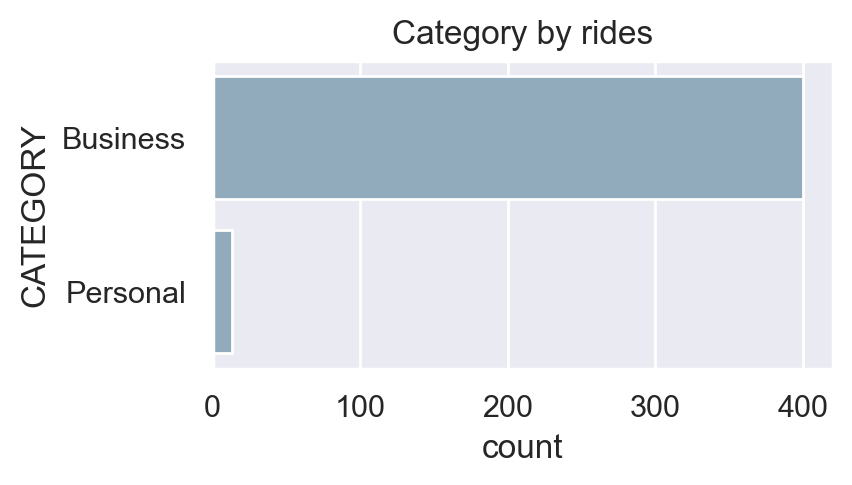

In [21]:
plt.show()

 

##### from the "category by rides" chart we can see that the largest count is for business category which conclude that most of the rides are booked for business category

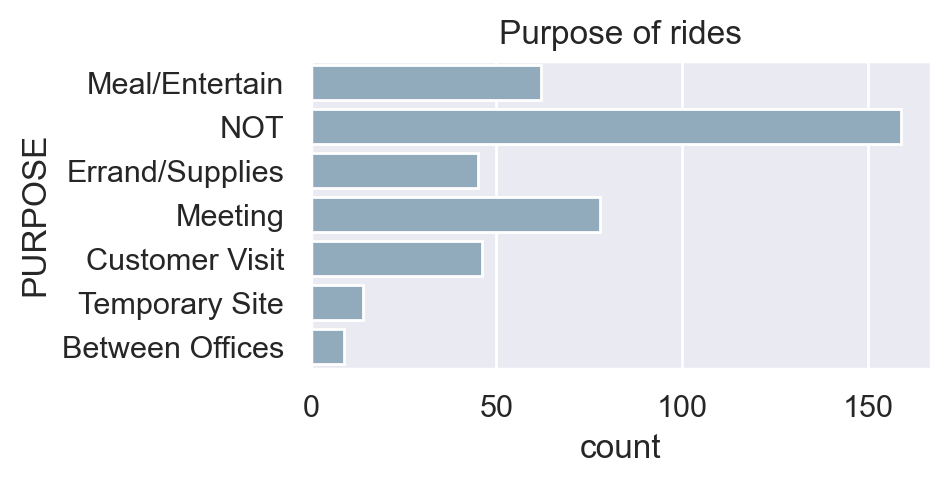

In [22]:
# Q2) For which purpose do people book Uber rides the most?

sns.countplot(df["PURPOSE"])
plt.title("Purpose of rides")
plt.show()

##### from the "purpose by rides" chart we can see that the largest count is for "NOT" but as it is null values count, therefore we will consider most rides books for the purpose of meeting follwed by meal/entertainment purposes

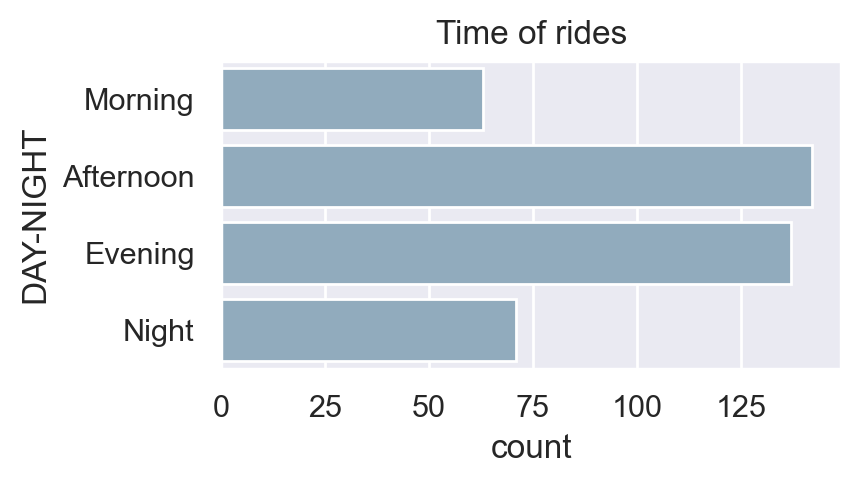

In [23]:
# Q3) at which time  do people book Uber rides the most?

sns.countplot(df["DAY-NIGHT"])
plt.title("Time of rides")
plt.show()

##### from the 'time of rides' chart we can see that the largest count is for afternoon time which conclude that most of the rides are booked for the time 10 to 15(afternoon) time.

In [24]:
# Q4) In which months do people book uber rides less frequently?

df["MONTH"]  = pd.DatetimeIndex(df["START_DATE"]).month   # extract months form START_DATE column

month_label = {1.0:"Jan",2.0:"Feb",3.0:"Mar",4.0: "April",
               5.0: "May",6.0:"June",7.0:"July",8.0:"Aug",
               9.0:"Sept",10.0:"Oct",11.0:"Nov",12.0:"Dec"}   # assigns months to string(monthname)

df["MONTH"] = df.MONTH.map(month_label)        # replaces month number to months names

mon = df.MONTH.value_counts(sort = False)     # counts of every months

In [25]:
df.head()          # check month column is added or not

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


In [26]:
d = pd.DataFrame({
    "MONTHS" : mon.values,        #total of every month
    "VALUE COUNT" :df.groupby("MONTH",sort = False)["MILES"].max()      # max miles values of every month
})


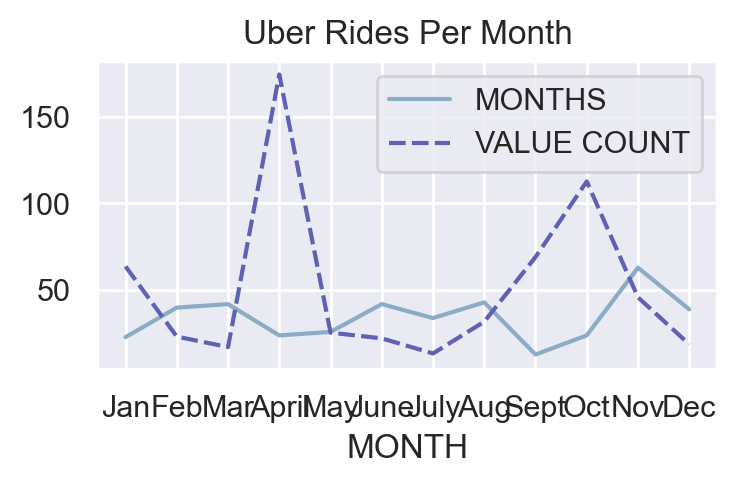

<Figure size 1600x400 with 0 Axes>

In [27]:
p = sns.lineplot(data = d)  
plt.title("Uber Rides Per Month")
plt.show()
p.set(xlabel = "MONTHS",ylabel = "VALUE COUNT")         
plt.figure(figsize = (8,2))

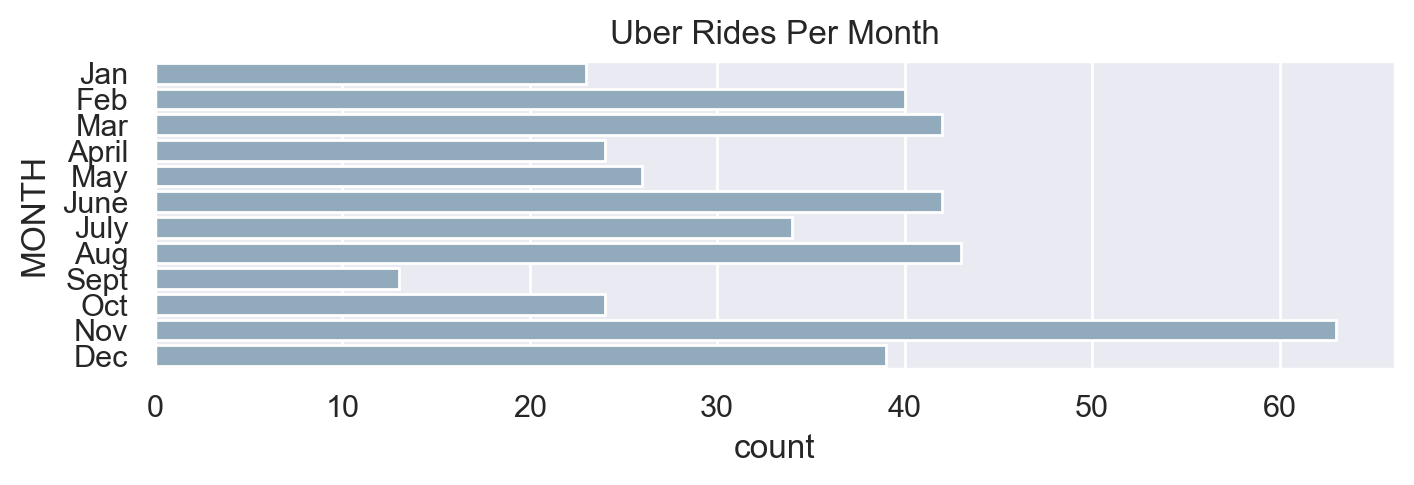

In [28]:
sns.countplot(df["MONTH"])
plt.title("Uber Rides Per Month")
plt.show()

##### from the "Uber rides per month "chart we can see that the people book uber rides in september less frequently. 

In [29]:
# Q5) On which days of the week do people book uber rides the most?

df["DAY"] = df.START_DATE.dt.weekday         # extracting DAY from start_date column

day_label = { 0:"Mon", 1:" Tues",2:"Wed",3:"Thur",4:"Fri",5:"Sat",6:"Sun"}      # assign weeknames to every weeknumber

df["DAY"] = df["DAY"].map(day_label)              # replaces weeknumber to weeknames

In [30]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


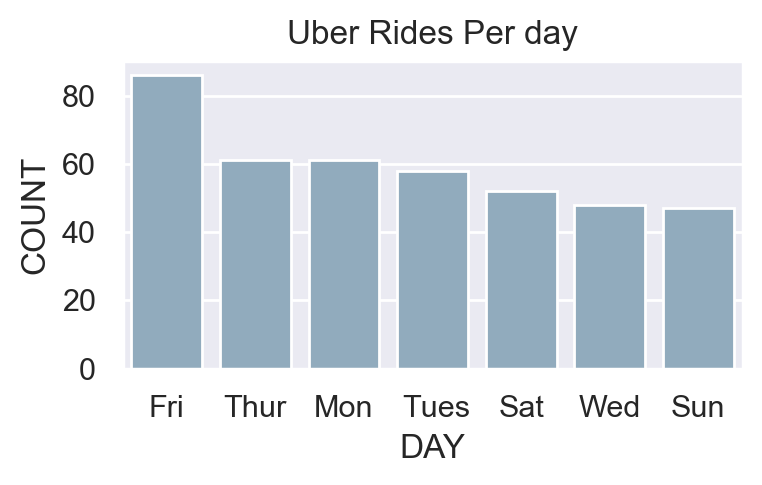

In [31]:
day_label = df.DAY.value_counts()           # gives the count of each  day

sns.barplot(x = day_label.index, y = day_label)
plt.xlabel("DAY")
plt.ylabel("COUNT")
plt.title("Uber Rides Per day")
plt.show()

##### from the "Uber rides per day" chart we can see that the largest count is of friday which conclude that most of the rides are booked for  friday.

In [32]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


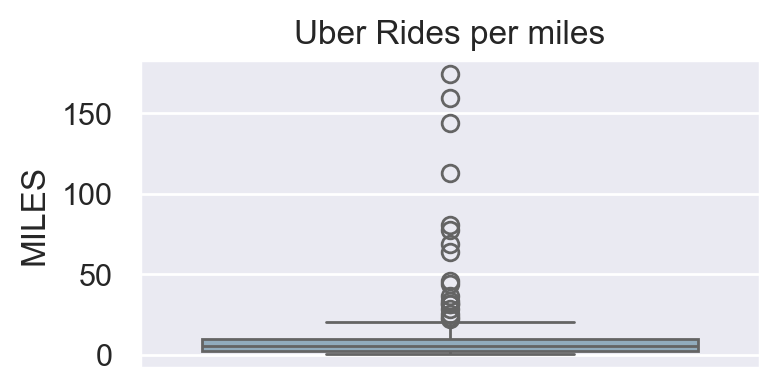

In [33]:
# Q6) How many miles do people usually book a cab for through Uber?

sns.boxplot(df["MILES"])
plt.title("Uber Rides per miles")
plt.show()

In [34]:
(df["MILES"]).max()  # max value of mile booked

174.2

In [35]:
#  From the above chart we can see that the  cab is  booked for the largest of 174.2 miles that is beyond 150 miles in the chart.

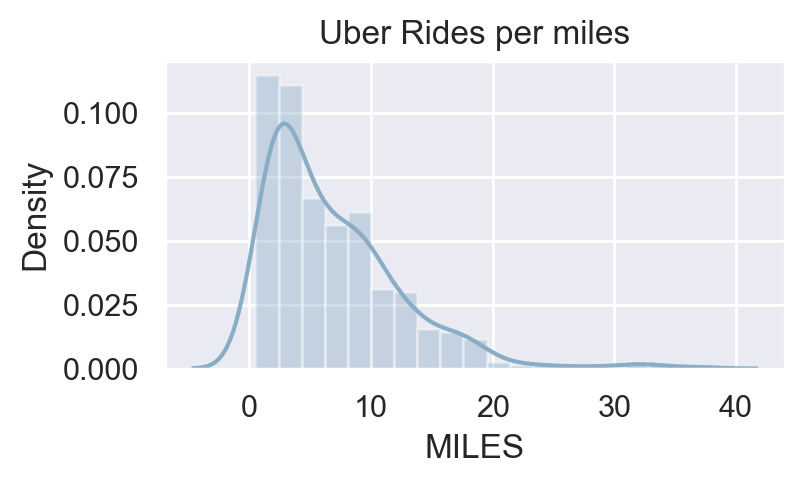

In [36]:
sns.distplot(df[df["MILES"]<40]["MILES"])
sns.set_theme( palette = "twilight")
plt.title("Uber Rides per miles")
plt.show()

##### from the " uber rides per miles"chart we can see that, maximun rides are booked from  0 to 10/20 miles as the peak value for this datapoints is too high as campare to others.

# Conclusion

From the Uber rides analysis using python we can conclude that, Uber rides are mostly booked for the business for the purpose of
meeting followed by meal/entertainment purpose. it is mostly booked in the afternoon between 10 to 15 hrs. 
in the month of september the rides are booked less frequently, opposite to this people mostly books the ride in days like
friday, ubers cabs are mostly booked to take rides between 0 to 10 or 20 miles.
